In [17]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 17 16:48:11 2015

@author: ruifpmaia
"""

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.metrics import mean_absolute_error
from math import sqrt
import numpy as np
import glob
import os
import csv
import time

%matplotlib inline

In [157]:
def draw_violin(a,b,c,d,e, label, tickslabellist):
    data = [a['rmse'], b['rmse'], c['rmse'], d['rmse'], e['rmse']]
    fig = plt.figure(figsize=(10,6))
    gs = gridspec.GridSpec(2, 1, height_ratios=[2, 5]) 
    ax = plt.subplot(gs[1])
    ax.set_xticklabels([0] + tickslabellist, fontsize=14)
    # Add axis labels and title
    plt.xlabel(label, fontsize=14)
    plt.ylabel('RMSE', fontsize=14)
    plt.yticks(fontsize = 14)
    plt.violinplot(data, showmedians=True)
    ax = plt.subplot(gs[0])
    ax.axes.get_xaxis().set_visible(False)
    bar_values = [a['rmse'].shape[0], b['rmse'].shape[0], c['rmse'].shape[0], d['rmse'].shape[0], e['rmse'].shape[0]]
    size_df = pd.DataFrame(bar_values)
    size_df.plot(kind='bar', ax = ax, width=0.4, legend=False)
    plt.ylabel('Rating Events', fontsize=14)
    plt.xlabel(label, fontsize=14)
    plt.yticks(fontsize = 14) 
    # add bar labels
    xx = range(len(bar_values))
    ymax = 0
    for x, y in zip(xx, bar_values):
        plt.text(x, y, str(y), ha='center', va='bottom', fontsize=14)
        if (int(y) > ymax):
            ymax = int(y)
    plt.ylim(0,1.3*ymax)
    plt.xlim(-1,5)
    plt.tight_layout()
    plt.subplots_adjust(wspace=5)


In [24]:
#dietary groups
hash_rec = {}

# Load events with Dietary Groups
# epicurious_ds15 - Rating + User + Item + Groups
with open('Analysis_Graphics\\foodcom_ds15', 'rb') as f:
    reader = csv.reader(f, delimiter='\t')
    for line in reader:
        line = map(lambda i: int(i.replace(":1","")), filter(None, line))
        # get feature id for recipeid
        fid = line[2]
        feature_id = hash_rec.get(fid, 0)
        # if null, add id and increment unique_identifier
        if ((feature_id) == 0):
            hash_rec[fid] = line[3:]
print 'Recipes with Dietary Groups:%d' % len(hash_rec)


Recipes with Dietary Groups:226025


In [25]:
#ingredients
hash_ing = {}

# Load events with Dietary Groups
# epicurious_ds8 - Rating + User + Item + Ingredients
with open('Analysis_Graphics\\foodcom_ds8', 'rb') as f:
    reader = csv.reader(f, delimiter='\t')
    for line in reader:
        line = map(lambda i: int(i.replace(":1","")), filter(None, line)) 
        # get feature id for recipeid
        fid = line[2]
        feature_id = hash_ing.get(fid, 0)
        # if null, add id and increment unique_identifier
        if ((feature_id) == 0):
            hash_ing[fid] = line[3:]
print 'Recipes with Ingredients:%d' % len(hash_ing)

Recipes with Ingredients:226025


In [26]:
#cuisines
hash_cui = {}

# Load events with Dietary Groups
# epicurious_ds14 - Rating + User + Item + Categories
with open('Analysis_Graphics\\foodcom_ds14', 'rb') as f:
    reader = csv.reader(f, delimiter='\t')
    for line in reader:
        line = map(lambda i: int(i.replace(":1","")), filter(None, line)) 
        # get feature id for recipeid
        fid = line[2]
        feature_id = hash_cui.get(fid, 0)
        # if null, add id and increment unique_identifier
        if ((feature_id) == 0):
            hash_cui[fid] = line[3:]
print 'Recipes with Cuisines:%d' % len(hash_cui)

Recipes with Cuisines:226025


In [169]:
dgres_df = []
cuires_df = []
ingres_df =[]
base_fd = []

tic = time.clock()
#foodcom_ds6 - Rating + User + Item + AvgRatUser + AvgRatItem
ds_filename = "Analysis_Graphics\\food\\ProcessedInput\\foodcom_ds6.*.test.libfm"
for in_file in glob.glob(ds_filename):
    # open corresponding input file - k5
    res_file = in_file.replace("ProcessedInput", "ProcessedOutput").replace("test.libfm", "k5.txt")  
    # read files
    base_rec  = pd.read_table(res_file, sep='\t', skip_blank_lines=True, header=None)
    print 'Read file:' + in_file
    index = 0
    with open(in_file, 'rb') as f:
        reader = csv.reader(f, delimiter='\t')
        event_list = list(reader)
        for fvec in event_list:        
            #get rec_id
            rec_id = int(fvec[2].replace(":1",""))
            #get dietary groups 
            dg = hash_rec.get(rec_id, 0)
            #get cuisines
            cuigrp = hash_cui.get(rec_id, 0)
            #get ingredients
            inggrp = hash_ing.get(rec_id, 0)
            #calculate MAE, calculate RMSE
            mae = mean_absolute_error([int(fvec[0])], [base_rec.get_value(index,0)])
            rmse = sqrt(mae)
            if (dg != 0):
                for dg_id in dg:                
                    dgres_df.append([dg_id, rmse, mae])
            if (cuigrp != 0):
                for cuisine_id in cuigrp:          
                    cuires_df.append([cuisine_id, rmse, mae])   
            if (inggrp != 0):
                for ingredient_id in inggrp:                
                    ingres_df.append([ingredient_id, rmse, mae])
            # User and item df
            base_fd.append([fvec[0],fvec[1],fvec[2],rmse,mae])
            index += 1

cuires_df = pd.DataFrame(cuires_df)
ingres_df = pd.DataFrame(ingres_df)
dgres_df = pd.DataFrame(dgres_df)
base_fd = pd.DataFrame(base_fd)

print 'Cuisines Types final shape:' + str(cuires_df.shape)
print 'Ingredients DF final shape:' + str(ingres_df.shape) 
print 'Dietary Groups DF final shape:' + str(dgres_df.shape) 
print 'User and Item DF final shape:' + str(base_fd.shape) 
toc = time.clock()
print 'Processing time (sec):' + str(toc - tic)

Read file:Analysis_Graphics\food\ProcessedInput\foodcom_ds6.3.test.libfm
Read file:Analysis_Graphics\food\ProcessedInput\foodcom_ds6.2.test.libfm
Read file:Analysis_Graphics\food\ProcessedInput\foodcom_ds6.4.test.libfm
Read file:Analysis_Graphics\food\ProcessedInput\foodcom_ds6.1.test.libfm
Read file:Analysis_Graphics\food\ProcessedInput\foodcom_ds6.5.test.libfm
Cuisines Types final shape:(1475435, 3)
Ingredients DF final shape:(5133092, 3)
Dietary Groups DF final shape:(701409, 3)
User and Item DF final shape:(692480, 5)
Processing time (sec):89.7611484049


### User analysis

In [158]:
base_fd.columns=['rating','userid','itemid','rmse','mae']
base_user = base_fd.groupby('userid')

# group users by rating count
a = base_user.filter(lambda x: len(x) < 50)
print a.shape
b = base_user.filter(lambda x: 50 <= len(x) < 100)
print b.shape
c = base_user.filter(lambda x: 100 <= len(x) < 200)
print c.shape
d = base_user.filter(lambda x: 200 <= len(x) < 300)
print d.shape
e = base_user.filter(lambda x: len(x) >= 300)
print e.shape

(248120, 5)
(90462, 5)
(91673, 5)
(52106, 5)
(210119, 5)


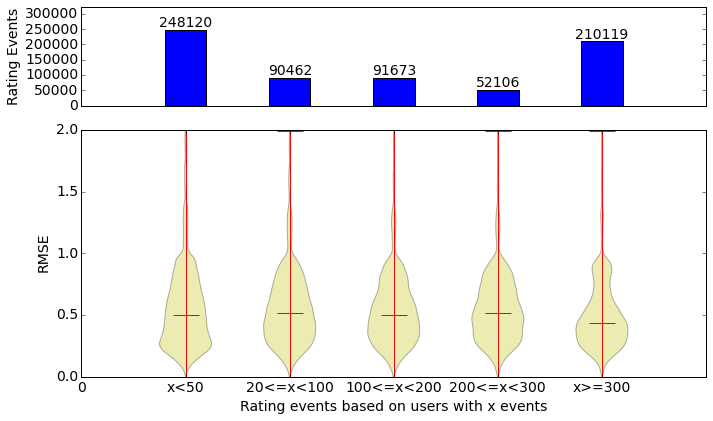

In [159]:
draw_violin(a,b,c,d,e,'Rating events based on users with x events', ['x<50','20<=x<100','100<=x<200','200<=x<300','x>=300'])

### Item analysis

In [160]:
base_item = base_fd.groupby('itemid')
# group users by rating count
a = base_item.filter(lambda x: len(x) < 30)
print a.shape
b = base_item.filter(lambda x: 30 <= len(x) < 60)
print b.shape
c = base_item.filter(lambda x: 60 <= len(x) < 100)
print c.shape
d = base_item.filter(lambda x: 100 <= len(x) < 200)
print d.shape
e = base_item.filter(lambda x: len(x) >= 200)
print e.shape

(446858, 5)
(90105, 5)
(50857, 5)
(56767, 5)
(47893, 5)


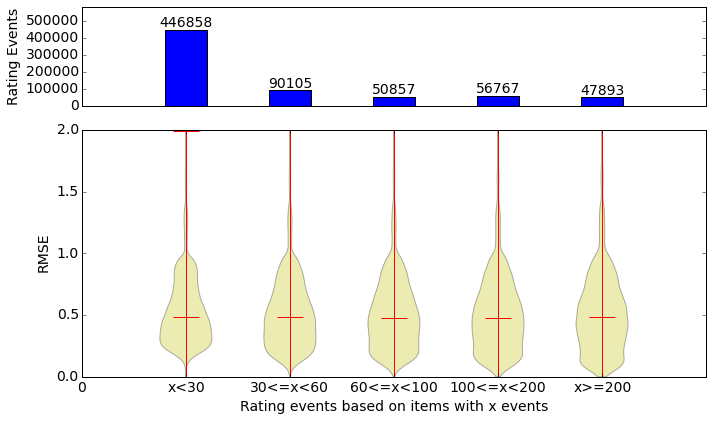

In [162]:
draw_violin(a,b,c,d,e,'Rating events based on items with x events', ['x<30','30<=x<60','60<=x<100','100<=x<200','x>=200'])

### Cuisine Type analysis

In [170]:
cuires_df.columns=['cid','rmse','mae']
food_cui = cuires_df.groupby('cid')
# cuisine types by event count
a = food_cui.filter(lambda x: len(x) < 25000)
print a.shape
b = food_cui.filter(lambda x: 25000 <= len(x) < 50000)
print b.shape
c = food_cui.filter(lambda x: 50000 <= len(x) < 75000)
print c.shape
d = food_cui.filter(lambda x: 75000 <= len(x) < 100000)
print d.shape
e = food_cui.filter(lambda x: len(x) >= 100000)
print e.shape

(146030, 3)
(57593, 3)
(131076, 3)
(460267, 3)
(680469, 3)


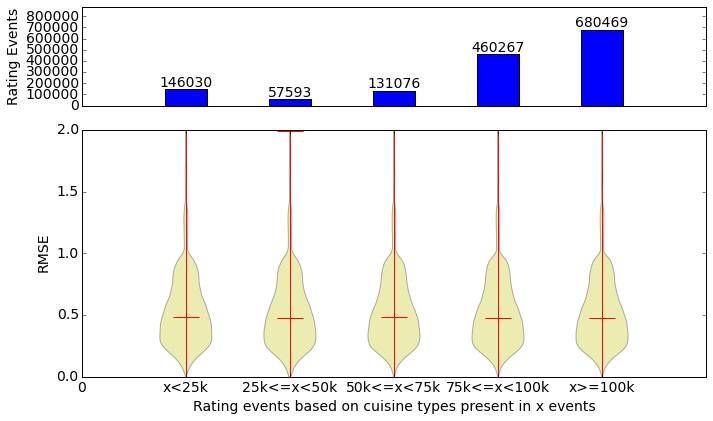

In [171]:
draw_violin(a,b,c,d,e,'Rating events based on cuisine types present in x events', ['x<25k','25k<=x<50k','50k<=x<75k','75k<=x<100k','x>=100k'])

### Dietary Group analysis

In [182]:
dgres_df.columns=['dgid','rmse','mae']
food_dg = dgres_df.groupby('dgid')
# dietarey groups by event count
a = food_dg.filter(lambda x: len(x) < 5000)
print a.shape
b = food_dg.filter(lambda x: 5000 <= len(x) < 10000)
print b.shape
c = food_dg.filter(lambda x: 10000 <= len(x) < 15000)
print c.shape
d = food_dg.filter(lambda x: 15000 <= len(x) < 30000)
print d.shape
e = food_dg.filter(lambda x: len(x) >= 30000)
print e.shape

(74374, 3)
(79626, 3)
(11323, 3)
(87643, 3)
(448443, 3)


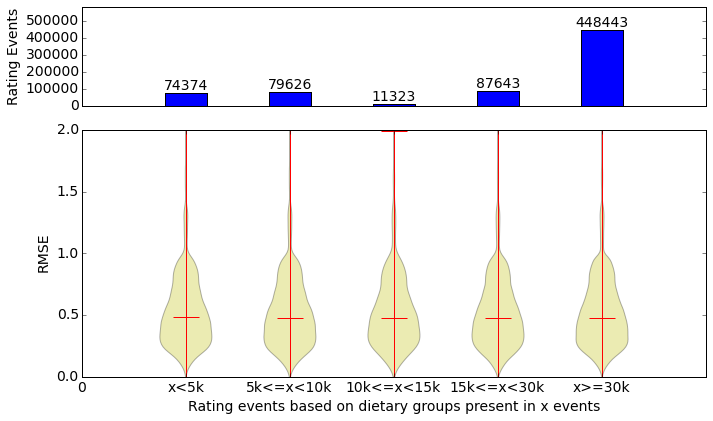

In [184]:
draw_violin(a,b,c,d,e,'Rating events based on dietary groups present in x events', ['x<5k','5k<=x<10k','10k<=x<15k','15k<=x<30k','x>=30k'])

### Ingredient analysis

In [185]:
ingres_df.columns=['ingid','rmse','mae']
food_ing = ingres_df.groupby('ingid')
# ingredient groups by event count
a = food_ing.filter(lambda x: len(x) < 5000)
print a.shape
b = food_ing.filter(lambda x: 5000 <= len(x) < 10000)
print b.shape
c = food_ing.filter(lambda x: 10000 <= len(x) < 15000)
print c.shape
d = food_ing.filter(lambda x: 15000 <= len(x) < 30000)
print d.shape
e = food_ing.filter(lambda x: len(x) >= 30000)
print e.shape

(1487961, 3)
(573667, 3)
(394322, 3)
(632845, 3)
(2044297, 3)


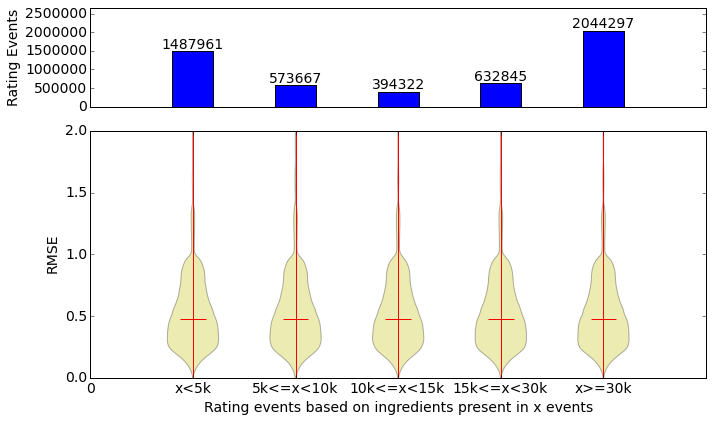

In [186]:
draw_violin(a,b,c,d,e,'Rating events based on ingredients present in x events', ['x<5k','5k<=x<10k','10k<=x<15k','15k<=x<30k','x>=30k'])